In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
df=pd.read_csv('/content/heart_disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.nunique()


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

1.) There are 303 Rows and 14 columns in the dataframe.
2.) No missing values.
3.) Out of fourteen columns Nine columns are categorical.
4.) Let us change their data type as categorical.


In [ ]:
df['sex']=df['sex'].astype('category')
df['cp']=df['cp'].astype('category')
df['fbs']=df['fbs'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['thal']=df['thal'].astype('category')
df['ca']=df['ca'].astype('category')
df['target']=df['target'].astype('category')

In [ ]:
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

Measure of central tendency and spread of the data

In [ ]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Exploring the categorical variable using count plot.

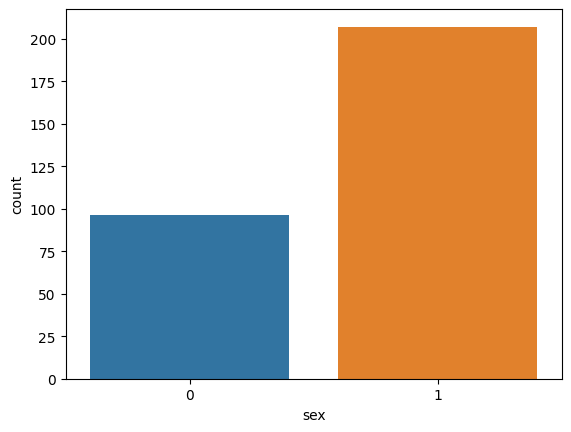

In [ ]:
sns.countplot(x='sex',data=df)
plt.show()

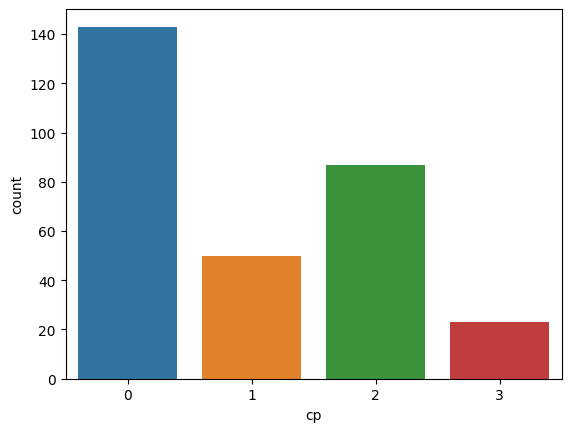

In [ ]:
sns.countplot(x='cp',data=df)
plt.show()

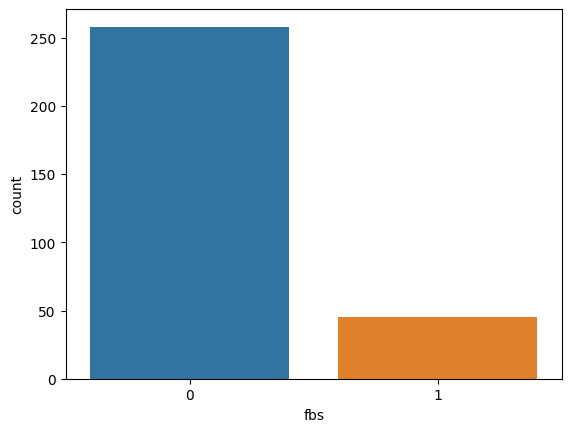

In [ ]:
sns.countplot(x='fbs',data=df)
plt.show()

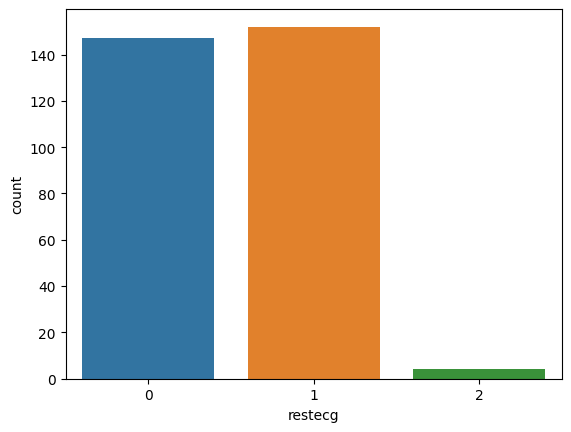

In [ ]:
sns.countplot(x='restecg',data=df)
plt.show()



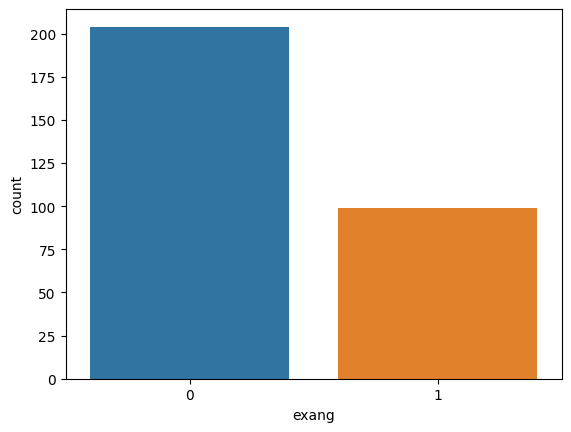

In [ ]:
sns.countplot(x='exang',data=df)
plt.show()

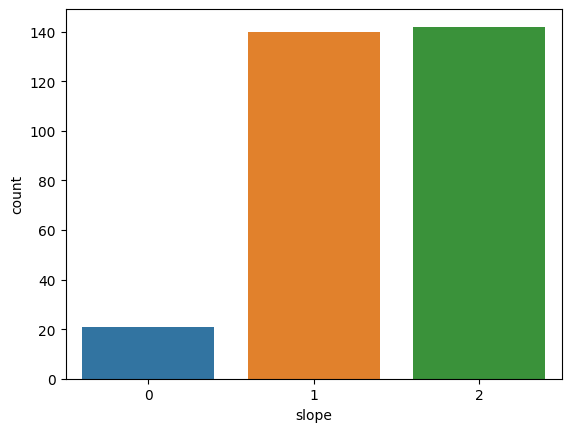

In [ ]:
sns.countplot(x='slope',data=df)
plt.show()

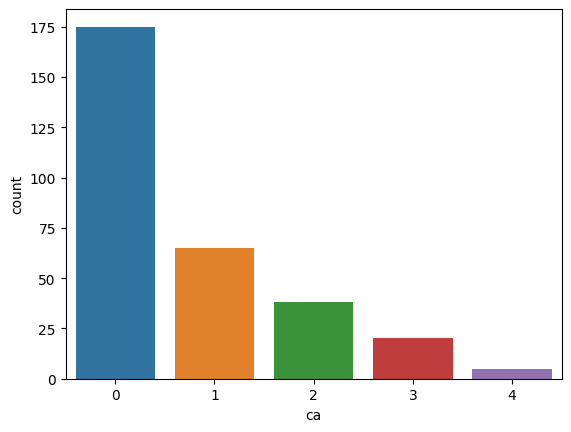

In [ ]:
sns.countplot(x='ca',data=df)
plt.show()

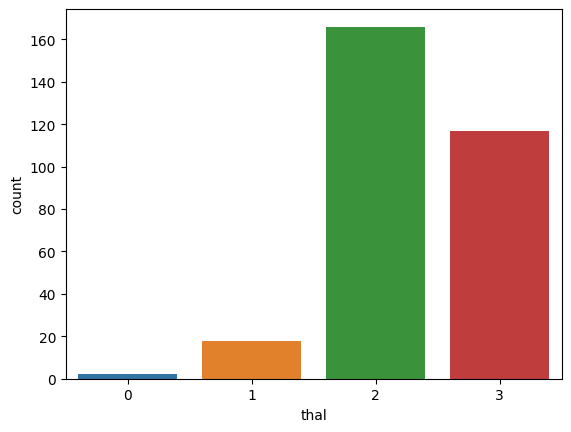

In [ ]:
sns.countplot(x='thal',data=df)
plt.show()

Studying the occurence of cvd across the age category.

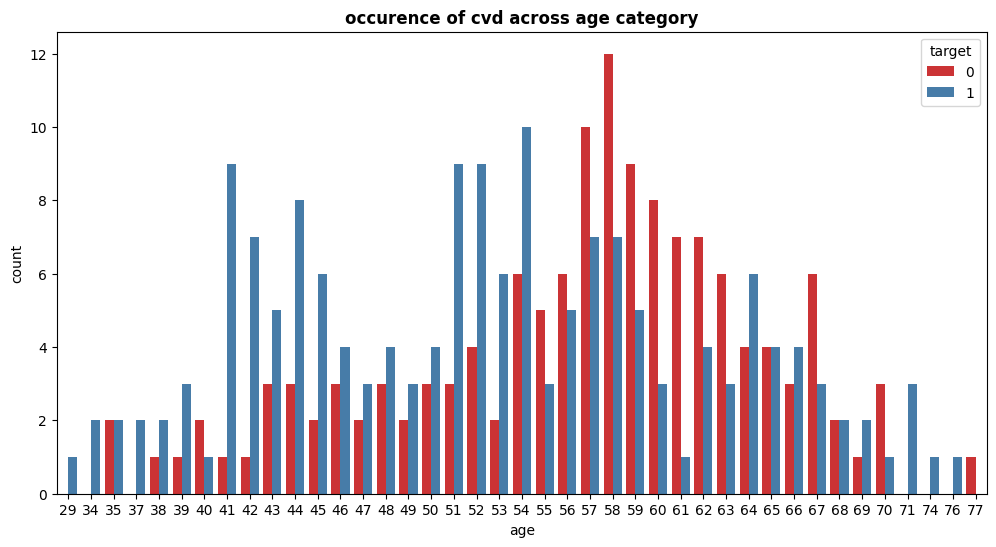

In [ ]:
#sns.boxplot(x='age',y='target',data=df)
fig=plt.figure(figsize=(12,6))
#ages=df['age']
ax=sns.countplot(x='age',hue='target',data=df,palette='Set1')
ax.set_title("occurence of cvd across age category",weight='bold')
plt.show()

Studying the occurence of cvd cross sex category

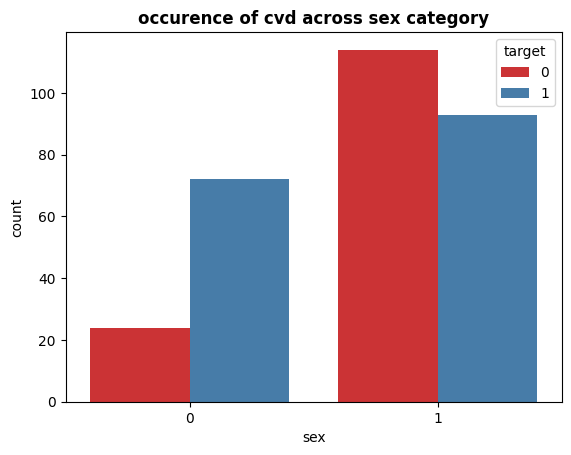

In [ ]:
#ages=df['age']
ax=sns.countplot(x='sex',hue='target',data=df,palette='Set1')
ax.set_title("occurence of cvd across sex category",weight='bold')
plt.show()

Study if one can detect heart attacks based on anomalies in the resting blood sugar of a patient.

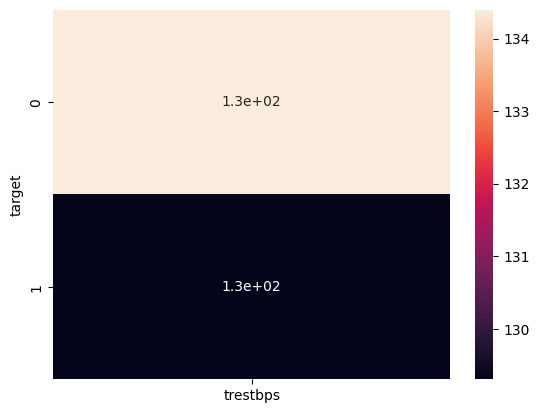

In [ ]:
m=df.pivot_table(values='trestbps',index='target',aggfunc='mean')
sns.heatmap(m,annot=True)
plt.show()




<Axes: xlabel='trestbps', ylabel='target'>

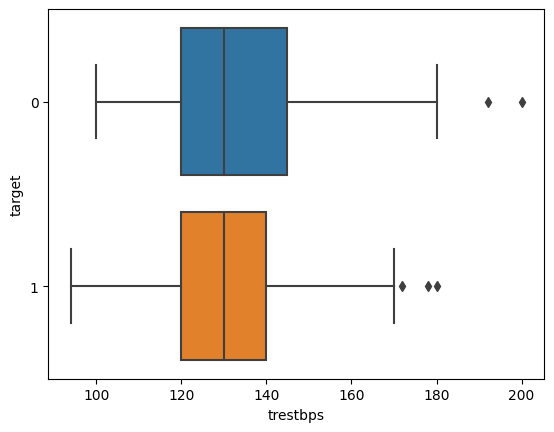

In [ ]:
sns.boxplot(x='trestbps',y='target',data=df)

# Analysis
Using box plot and pivot table we analyse that mean value of resting blood sugar for the person having cardiovascular disease and not having cardiovascular disease is same. So, resting blood sugar has no impact on target

EXPLORING the relationship between cholestrol levels and target variable.


<Axes: xlabel='chol', ylabel='target'>

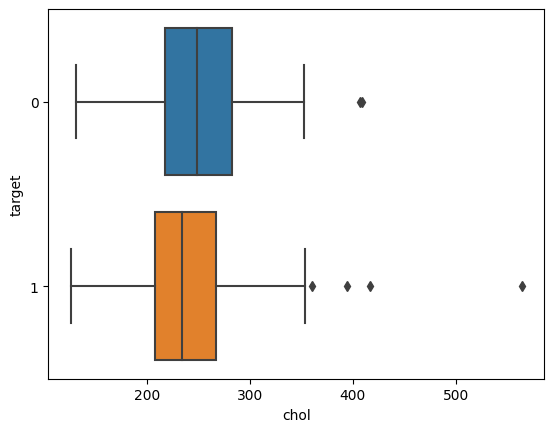

In [ ]:
sns.boxplot(x='chol',y='target',data=df)

# Analysis
A person having cholestrol in the range 200-300 have high risk of getting the cardiovascular disease.

#Relationship between peak exercise and the occurence of heart attack

<Axes: xlabel='oldpeak', ylabel='target'>

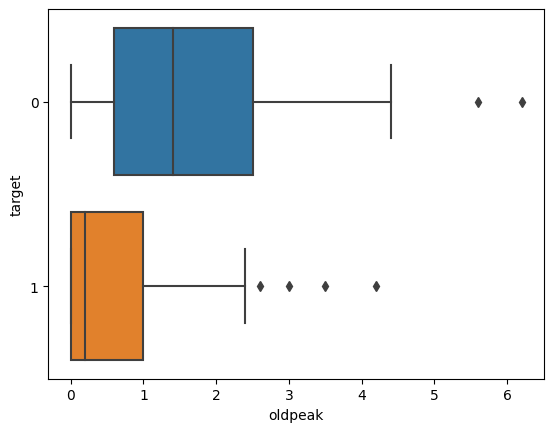

In [ ]:
sns.boxplot(x='oldpeak',y='target',data=df)

Checking if thalasemia is a major cause of cardiovascular disease

In [ ]:
df.groupby(['thal','target']).size()


thal  target
0     0           1
      1           1
1     0          12
      1           6
2     0          36
      1         130
3     0          89
      1          28
dtype: int64

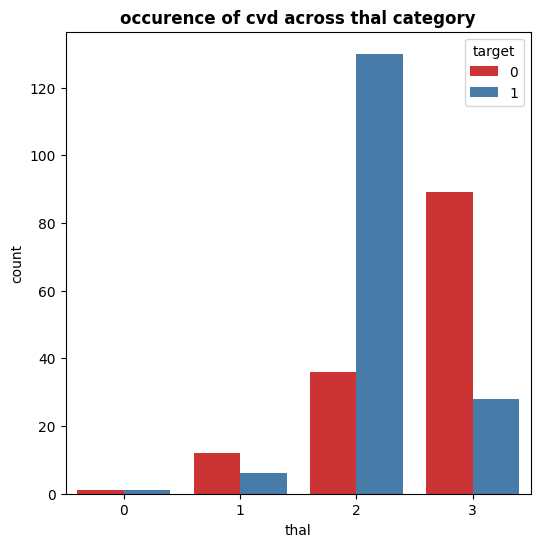

In [ ]:
fig=plt.figure(figsize=(6,6))
#ages=df['age']
ax=sns.countplot(x='thal',hue='target',data=df,palette='Set1')
ax.set_title("occurence of cvd across thal category",weight='bold')
plt.show()

Using Heatmap and pair plot to understand the relationship between variables.

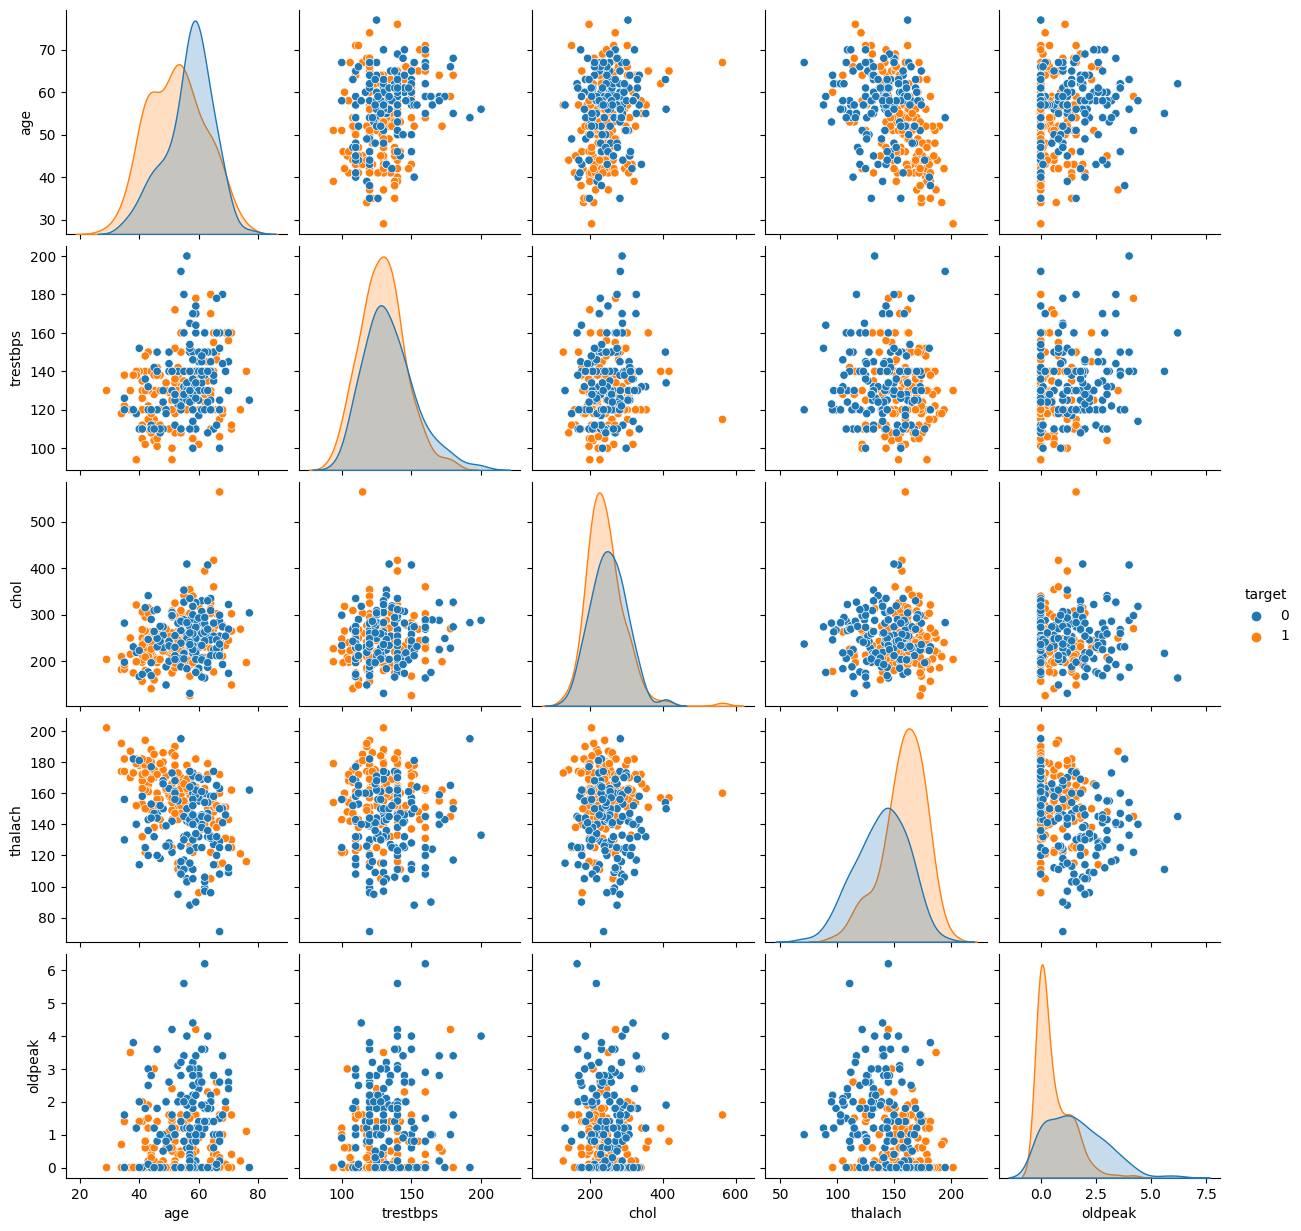

In [ ]:
sns.pairplot(df,hue='target')
plt.show()

In [ ]:
x=df.drop(["target"],axis=1)
y=df.target

Standarisation helps us to scale down our feature according to standard normal distribution with mean zero and standard deviation one. We need to apply this in Gradient Descent technique.

In [ ]:
from sklearn.preprocessing import StandardScaler
#instantiate the standard scaler:create an instance
scaler=StandardScaler(copy =True , with_mean= True , with_std=True)
#fitting the scaler on data
x1=scaler.fit_transform(x)
print(x)
print(x1)


     age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope ca  \
0     63   1  3       145   233   1       0      150     0      2.3     0  0   
1     37   1  2       130   250   0       1      187     0      3.5     0  0   
2     41   0  1       130   204   0       0      172     0      1.4     2  0   
3     56   1  1       120   236   0       1      178     0      0.8     2  0   
4     57   0  0       120   354   0       1      163     1      0.6     2  0   
..   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ... ..   
298   57   0  0       140   241   0       1      123     1      0.2     1  0   
299   45   1  3       110   264   0       1      132     0      1.2     1  0   
300   68   1  0       144   193   1       1      141     0      3.4     1  2   
301   57   1  0       130   131   0       1      115     1      1.2     1  1   
302   57   0  1       130   236   0       0      174     0      0.0     1  1   

    thal  
0      1  
1      2  
2     

Result of the scaler is always in array form. We are done with scaling no let us fit and train the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x1,y,test_size=0.30,stratify=y,random_state=12)

In [ ]:
#import the class
from sklearn.linear_model import LogisticRegression
# creating an object of logistic Regression
logreg_model=LogisticRegression(max_iter=200)
#training and fitting the model (ye training kr krke fit ho jayenge)
logreg_model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [ ]:
#lets do prediction using trained model
y_predict=logreg_model.predict(X_test)

In [ ]:
y_predict

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1])

In [ ]:
#generate predictions in the form of probability distributions
y_predprob=logreg_model.predict_proba(X_test)

In [ ]:
y_predprob

array([[0.92965103, 0.07034897],
       [0.20345474, 0.79654526],
       [0.95796063, 0.04203937],
       [0.01748095, 0.98251905],
       [0.90506672, 0.09493328],
       [0.17410149, 0.82589851],
       [0.19336345, 0.80663655],
       [0.68374277, 0.31625723],
       [0.11645309, 0.88354691],
       [0.82116735, 0.17883265],
       [0.36000637, 0.63999363],
       [0.99441906, 0.00558094],
       [0.99179379, 0.00820621],
       [0.08350119, 0.91649881],
       [0.05714168, 0.94285832],
       [0.0265642 , 0.9734358 ],
       [0.98971609, 0.01028391],
       [0.37593781, 0.62406219],
       [0.10014818, 0.89985182],
       [0.86589043, 0.13410957],
       [0.03384061, 0.96615939],
       [0.00538218, 0.99461782],
       [0.24227796, 0.75772204],
       [0.20768141, 0.79231859],
       [0.12832705, 0.87167295],
       [0.02745489, 0.97254511],
       [0.20270305, 0.79729695],
       [0.36295984, 0.63704016],
       [0.12889996, 0.87110004],
       [0.35942831, 0.64057169],
       [0.

In [ ]:
#import the necessary models
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(Y_test,y_predict)

array([[26, 15],
       [ 3, 47]])

In [ ]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74        41
           1       0.76      0.94      0.84        50

    accuracy                           0.80        91
   macro avg       0.83      0.79      0.79        91
weighted avg       0.82      0.80      0.80        91



In [ ]:
logreg_model.coef_[0]

array([-0.14971047, -0.54859584,  0.92239948, -0.19334639, -0.28277764,
       -0.02548481,  0.11582919,  0.40114674, -0.37873312, -0.83055024,
        0.25811224, -0.89858756, -0.50409376])

In [ ]:
X = df.drop('target', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [ ]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal','ca'])

In [ ]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,1,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,1,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,1,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
X_encoded.shape

(303, 27)

In [ ]:
Y = df['target'].copy()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
## split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X_encoded, Y, random_state=21)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#creating an object od random forest classifier
ranf = RandomForestClassifier(random_state=21)

#dictionary of the hyperparameters to be tuned
params = {
    'max_depth': [5,20],
    'min_samples_leaf': range(1,20),
    'n_estimators': range(15,20)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=ranf,
                           param_grid=params,
                           cv = 4,
                           scoring="accuracy")

In [ ]:
grid_search.fit(X1_train,y1_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=21),
             param_grid={'max_depth': [5, 20], 'min_samples_leaf': range(1, 20),
                         'n_estimators': range(15, 20)},
             scoring='accuracy')

In [ ]:
ranf_best = grid_search.best_estimator_
ranf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=14, n_estimators=18,
                       random_state=21)

In [ ]:
y1_predict = ranf_best.predict(X1_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        39
           1       0.87      0.73      0.79        37

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



In [ ]:
y1_pred_train = ranf_best.predict(X1_train)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y1_train,y1_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        99
           1       0.86      0.93      0.89       128

    accuracy                           0.87       227
   macro avg       0.88      0.86      0.87       227
weighted avg       0.87      0.87      0.87       227



In [ ]:
ranf_best.feature_importances_

array([0.04233425, 0.01248853, 0.00677074, 0.01753728, 0.        ,
       0.08497612, 0.03135775, 0.13319655, 0.15434347, 0.00327066,
       0.02973152, 0.        , 0.0095766 , 0.0024671 , 0.        ,
       0.        , 0.03870071, 0.00463093, 0.        , 0.        ,
       0.04042359, 0.24288836, 0.11569887, 0.02960698, 0.        ,
       0.        , 0.        ])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X1_train.columns,
    "Imp": ranf_best.feature_importances_
})
imp_df

,Varname,Imp
0,age,0.042334
1,sex,0.012489
2,trestbps,0.006771
3,chol,0.017537
4,fbs,0.000000
5,thalach,0.084976
6,exang,0.031358
7,oldpeak,0.133197
8,cp_0,0.154343
9,cp_1,0.003271
